In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fileS = "data/2013-2022-emergency-shelter-occupancy-machine-readable.csv"
fileE = "data/avg_weekly_earnings.csv"
fileU = "data/unemployment_rate.csv"

shdf = pd.read_csv(fileS, parse_dates=["Date"])
edf = pd.read_csv(fileE, parse_dates=["When"])
udf = pd.read_csv(fileU, parse_dates=["When"])

/var/folders/sy/lsfn4dnx0x75hhnpd76qp_c40000gn/T/ipykernel_36920/2623877826.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  shdf = pd.read_csv(fileS, parse_dates=["Date"])


In [4]:
shdf.head(20)

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
0,2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,,75,65,,2013,4
1,2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70,74,,2013,4
2,2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250,253,,2013,4
3,2013-04-01,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,Mat Emergency Shelter Program,200,152,,2013,4
4,2013-04-01,Edmonton,Youth Emergency,Hope Mission - Youth,Hope Mission,Youth,60,51,,2013,4
5,2013-04-01,Edmonton,Women Emergency,Hope Mission - Women WEmS,Hope Mission,Women WEmS,70,51,,2013,4
6,2013-04-01,Edmonton,Short Term Supportive,Salvation Army Addictions and Residential Cent...,Salvation Army Addictions and Residential Centre,,148,143,,2013,4
7,2013-04-01,Edmonton,Short Term Supportive,McCauley Lodge - Short Term Supportive,McCauley Lodge,,58,57,,2013,4
8,2013-04-01,Edmonton,Short Term Supportive,Sparling Lodge - Short Term Supportive,Sparling Lodge,,20,21,,2013,4
9,2013-04-01,Edmonton,Short Term Supportive,Urban Manor - Short Term Supportive,Urban Manor,,75,55,,2013,4


In [5]:
shdf.loc[
    (shdf["Date"] == "2022-04-01") & (shdf["ShelterName"] == "Brendas House"),
    "Capacity",
] = 60

In [6]:
shdf["Y-M"] = shdf["Date"].dt.to_period("M")
shdf = shdf.loc[
    (shdf["City"] == "Calgary")
    & (shdf["Date"] >= "2013-04-01")
    & (shdf["Date"] < "2020-01-01"),
    ["Y-M", "Capacity", "Overnight"],
]

In [7]:
shdf

,Y-M,Capacity,Overnight
17,2013-04,725,700
18,2013-04,140,90
19,2013-04,270,262
20,2013-04,125,117
21,2013-04,23,12
...,...,...,...
93356,2019-12,80,75
93357,2019-12,68,68
93358,2019-12,80,45
93359,2019-12,40,0


In [8]:
shdf = shdf.astype({"Capacity": "int32", "Overnight": "int32"})

shdf = shdf.groupby("Y-M").sum(["Capacity", "Overnight"])

In [9]:
display(shdf)

,Capacity,Overnight
Y-M,,
2013-04,77250,67282
2013-05,75671,66496
2013-06,69030,56663
2013-07,71331,64111
2013-08,71331,64516
...,...,...
2019-08,70494,47212
2019-09,68220,45625
2019-10,70494,49750


In [10]:
shdf["Rate"] = shdf["Overnight"] / shdf["Capacity"]

In [11]:
shdf

,Capacity,Overnight,Rate
Y-M,,,
2013-04,77250,67282,0.870964
2013-05,75671,66496,0.878751
2013-06,69030,56663,0.820846
2013-07,71331,64111,0.898782
2013-08,71331,64516,0.904459
...,...,...,...
2019-08,70494,47212,0.669731
2019-09,68220,45625,0.668792
2019-10,70494,49750,0.705734


In [12]:
edf.head()

,Id,When,NAICS,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
0,272076,2001-01-01,Accommodation and food services,273.80,298.14,274.01,251.87,241.05,261.42,240.46,274.06,233.77,272.10,250.06,9/29/2022 8:23:03 AM
1,272077,2001-01-01,"Administrative and support, waste management a...",590.57,549.64,551.56,463.59,438.72,477.28,447.28,590.71,429.94,503.94,414.33,9/29/2022 8:23:03 AM
2,272078,2001-01-01,"Arts, entertainment and recreation",355.43,420.21,424.32,452.60,347.58,315.46,326.24,461.62,NaN,419.59,355.57,9/29/2022 8:23:03 AM
3,272079,2001-01-01,Construction,864.20,778.99,800.88,695.71,689.64,582.53,648.60,861.95,562.10,740.97,756.52,9/29/2022 8:23:03 AM
4,272080,2001-01-01,Educational services,638.47,722.88,672.97,618.34,670.52,706.13,633.63,641.57,683.85,709.37,686.72,9/29/2022 8:23:03 AM


In [13]:
udf.head()

,Id,When,Characteristic,NAICS,AgeGroup,Sex,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
0,1518250,1976-01-01,Unemployment rate,Accommodation and food services,15 years and over,Both sexes,9.6,11.8,10.7,13.4,9.5,17.3,10.5,10.4,33.3,10.6,4.9,9/9/2022 8:16:29 AM
1,1518251,1976-01-01,Unemployment rate,Accommodation and food services,15 years and over,Females,8.2,15.2,11.9,10.6,8.3,NaN,13.3,13.3,33.3,10.3,4.8,9/9/2022 8:16:29 AM
2,1518252,1976-01-01,Unemployment rate,Accommodation and food services,15 years and over,Males,NaN,NaN,9.0,15.1,NaN,26.3,NaN,6.8,66.7,10.8,NaN,9/9/2022 8:16:29 AM
3,1518253,1976-01-01,Unemployment rate,Agriculture,15 years and over,Both sexes,1.5,18.9,4.3,1.8,14.5,NaN,6.0,6.2,5.5,4.4,2.3,9/9/2022 8:16:29 AM
4,1518254,1976-01-01,Unemployment rate,Agriculture,15 years and over,Females,NaN,NaN,8.0,NaN,NaN,NaN,NaN,12.5,NaN,9.8,NaN,9/9/2022 8:16:29 AM


In [14]:
udf = udf.loc[(udf["When"] >= "2013-04-01") & (udf["When"] < "2020-01-01")]

In [15]:
udf

,Id,When,Characteristic,NAICS,AgeGroup,Sex,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
21274,1539524,2013-04-01,Unemployment rate,Accommodation and food services,15 years and over,Both sexes,5.1,5.5,6.2,5.6,11.2,11.4,10.1,5.0,17.2,7.9,5.0,9/9/2022 8:16:30 AM
21275,1539525,2013-04-01,Unemployment rate,Accommodation and food services,15 years and over,Females,4.3,4.9,6.2,4.3,11.2,13.7,11.9,5.1,19.5,8.1,6.6,9/9/2022 8:16:30 AM
21276,1539526,2013-04-01,Unemployment rate,Accommodation and food services,15 years and over,Males,6.3,6.6,6.2,7.1,11.4,NaN,8.0,4.8,13.0,7.7,NaN,9/9/2022 8:16:30 AM
21277,1539527,2013-04-01,Unemployment rate,Agriculture,15 years and over,Both sexes,NaN,10.6,5.1,3.2,28.6,NaN,18.0,3.9,14.3,6.1,1.4,9/9/2022 8:16:30 AM
21278,1539528,2013-04-01,Unemployment rate,Agriculture,15 years and over,Females,NaN,11.5,6.3,NaN,27.8,NaN,NaN,NaN,16.7,10.3,NaN,9/9/2022 8:16:30 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30214,1548464,2019-12-01,Unemployment rate,All Industries,15 years and over,Both sexes,7.4,4.9,5.8,5.1,7.8,12.7,8.2,5.4,7.8,5.3,6.1,9/9/2022 8:16:30 AM
30215,1548465,2019-12-01,Unemployment rate,All Industries,15 to 24 years,Females,11.0,8.9,9.9,6.9,11.7,12.9,10.4,11.2,5.6,7.5,11.9,9/9/2022 8:16:30 AM
30216,1548466,2019-12-01,Unemployment rate,All Industries,15 years and over,Females,6.6,5.0,5.5,4.7,6.3,9.3,7.2,5.5,6.5,4.7,5.6,9/9/2022 8:16:30 AM
30217,1548467,2019-12-01,Unemployment rate,All Industries,15 to 24 years,Males,18.6,9.2,12.5,11.8,12.0,22.8,15.5,12.1,9.5,10.8,16.6,9/9/2022 8:16:30 AM


In [16]:
udf["AgeGroup"].unique()

array(['15 years and over', '15 to 24 years'], dtype=object)

In [17]:
udf = udf.loc[
    (udf["NAICS"] == "All Industries")
    & (udf["Sex"] == "Both sexes")
    & (udf["AgeGroup"] == "15 years and over"),
    ["When", "Alberta"],
]
udf = udf.rename(columns={"When": "Date", "Alberta": "Unemployment AB"}, errors="raise")

In [18]:
udf

,Date,Unemployment AB
29734,2013-04-01,4.4
29740,2013-05-01,4.6
29746,2013-06-01,4.9
29752,2013-07-01,4.5
29758,2013-08-01,4.7
...,...,...
30190,2019-08-01,7.5
30196,2019-09-01,6.6
30202,2019-10-01,7.0
30208,2019-11-01,7.5


In [19]:
udf.head()

,Date,Unemployment AB
29734,2013-04-01,4.4
29740,2013-05-01,4.6
29746,2013-06-01,4.9
29752,2013-07-01,4.5
29758,2013-08-01,4.7


In [20]:
udf["Y-M"] = udf["Date"].dt.to_period("M")

In [21]:
udf

,Date,Unemployment AB,Y-M
29734,2013-04-01,4.4,2013-04
29740,2013-05-01,4.6,2013-05
29746,2013-06-01,4.9,2013-06
29752,2013-07-01,4.5,2013-07
29758,2013-08-01,4.7,2013-08
...,...,...,...
30190,2019-08-01,7.5,2019-08
30196,2019-09-01,6.6,2019-09
30202,2019-10-01,7.0,2019-10
30208,2019-11-01,7.5,2019-11


In [22]:
udf = udf[["Y-M", "Unemployment AB"]]

In [23]:
udf

,Y-M,Unemployment AB
29734,2013-04,4.4
29740,2013-05,4.6
29746,2013-06,4.9
29752,2013-07,4.5
29758,2013-08,4.7
...,...,...
30190,2019-08,7.5
30196,2019-09,6.6
30202,2019-10,7.0
30208,2019-11,7.5


In [24]:
edf.head()

,Id,When,NAICS,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan,ModifiedDate
0,272076,2001-01-01,Accommodation and food services,273.80,298.14,274.01,251.87,241.05,261.42,240.46,274.06,233.77,272.10,250.06,9/29/2022 8:23:03 AM
1,272077,2001-01-01,"Administrative and support, waste management a...",590.57,549.64,551.56,463.59,438.72,477.28,447.28,590.71,429.94,503.94,414.33,9/29/2022 8:23:03 AM
2,272078,2001-01-01,"Arts, entertainment and recreation",355.43,420.21,424.32,452.60,347.58,315.46,326.24,461.62,NaN,419.59,355.57,9/29/2022 8:23:03 AM
3,272079,2001-01-01,Construction,864.20,778.99,800.88,695.71,689.64,582.53,648.60,861.95,562.10,740.97,756.52,9/29/2022 8:23:03 AM
4,272080,2001-01-01,Educational services,638.47,722.88,672.97,618.34,670.52,706.13,633.63,641.57,683.85,709.37,686.72,9/29/2022 8:23:03 AM


In [25]:
udf.tail()

,Y-M,Unemployment AB
30190,2019-08,7.5
30196,2019-09,6.6
30202,2019-10,7.0
30208,2019-11,7.5
30214,2019-12,7.4


In [26]:
udf.dtypes

Y-M                period[M]
Unemployment AB      float64
dtype: object

In [27]:
edf["NAICS"].unique()

array(['Accommodation and food services',
       'Administrative and support, waste management and remediation services',
       'Arts, entertainment and recreation', 'Construction',
       'Educational services', 'Finance and insurance',
       'Forestry, logging and support',
       'Health care and social assistance',
       'Industrial aggregate excluding unclassified businesses',
       'Information and cultural industries',
       'Management of companies and enterprises', 'Manufacturing',
       'Mining, quarrying, and oil and gas extraction',
       'Other services (except public administration)',
       'Professional, scientific and technical services',
       'Public administration', 'Real estate and rental and leasing',
       'Trade', 'Transportation and warehousing', 'Utilities'],
      dtype=object)

In [28]:
edf = edf.loc[
    (edf["When"] >= "2013-04-01")
    & (edf["NAICS"] == "Industrial aggregate excluding unclassified businesses"),
    ["When", "Alberta"],
]

In [29]:
edf

,When,Alberta
2948,2013-04-01,1102.65
2968,2013-05-01,1097.42
2988,2013-06-01,1096.75
3008,2013-07-01,1098.22
3028,2013-08-01,1091.89
...,...,...
5088,2022-03-01,1264.69
5108,2022-04-01,1247.14
5128,2022-05-01,1249.94
5148,2022-06-01,1245.04


In [30]:
edf.tail()

,When,Alberta
5088,2022-03-01,1264.69
5108,2022-04-01,1247.14
5128,2022-05-01,1249.94
5148,2022-06-01,1245.04
5168,2022-07-01,1238.94


In [31]:
edf["Y-M"] = edf["When"].dt.to_period("M")
edf = edf.rename(columns={"Alberta": "Weekly Wages AB"})

In [32]:
edf = edf[["Y-M", "Weekly Wages AB"]]

In [33]:
edf.head(4)

,Y-M,Weekly Wages AB
2948,2013-04,1102.65
2968,2013-05,1097.42
2988,2013-06,1096.75
3008,2013-07,1098.22


In [34]:
a2 = shdf.join(udf.set_index("Y-M"), on="Y-M", how="inner")

In [35]:
a2

,Capacity,Overnight,Rate,Unemployment AB
Y-M,,,,
2013-04,77250,67282,0.870964,4.4
2013-05,75671,66496,0.878751,4.6
2013-06,69030,56663,0.820846,4.9
2013-07,71331,64111,0.898782,4.5
2013-08,71331,64516,0.904459,4.7
...,...,...,...,...
2019-08,70494,47212,0.669731,7.5
2019-09,68220,45625,0.668792,6.6
2019-10,70494,49750,0.705734,7.0


In [36]:
a3 = a2.join(edf.set_index("Y-M"), on="Y-M", how="inner")

In [37]:
a3

,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
Y-M,,,,,
2013-04,77250,67282,0.870964,4.4,1102.65
2013-05,75671,66496,0.878751,4.6,1097.42
2013-06,69030,56663,0.820846,4.9,1096.75
2013-07,71331,64111,0.898782,4.5,1098.22
2013-08,71331,64516,0.904459,4.7,1091.89
...,...,...,...,...,...
2019-08,70494,47212,0.669731,7.5,1155.09
2019-09,68220,45625,0.668792,6.6,1174.05
2019-10,70494,49750,0.705734,7.0,1192.36


In [38]:
a3 = a3.reset_index()

In [39]:
a3.dtypes

Y-M                period[M]
Capacity               int32
Overnight              int32
Rate                 float64
Unemployment AB      float64
Weekly Wages AB      float64
dtype: object

In [40]:
a4 = a3
a5 = a3

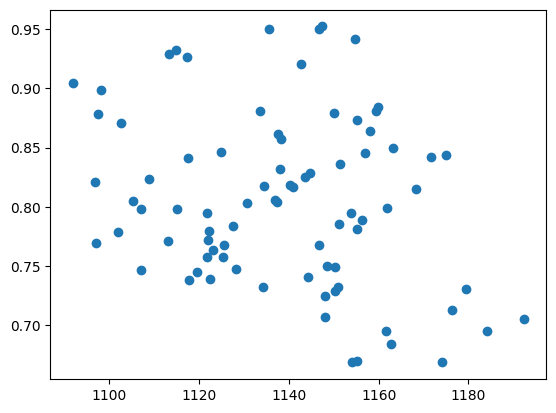

In [41]:
plt.scatter(x=a3["Weekly Wages AB"], y=a3["Rate"])

[Text(0.5, 80.7222222222222, 'Weekly Wages AB (CAD)'),
 Text(37.722222222222214, 0.5, 'Shelter admission Rate')]

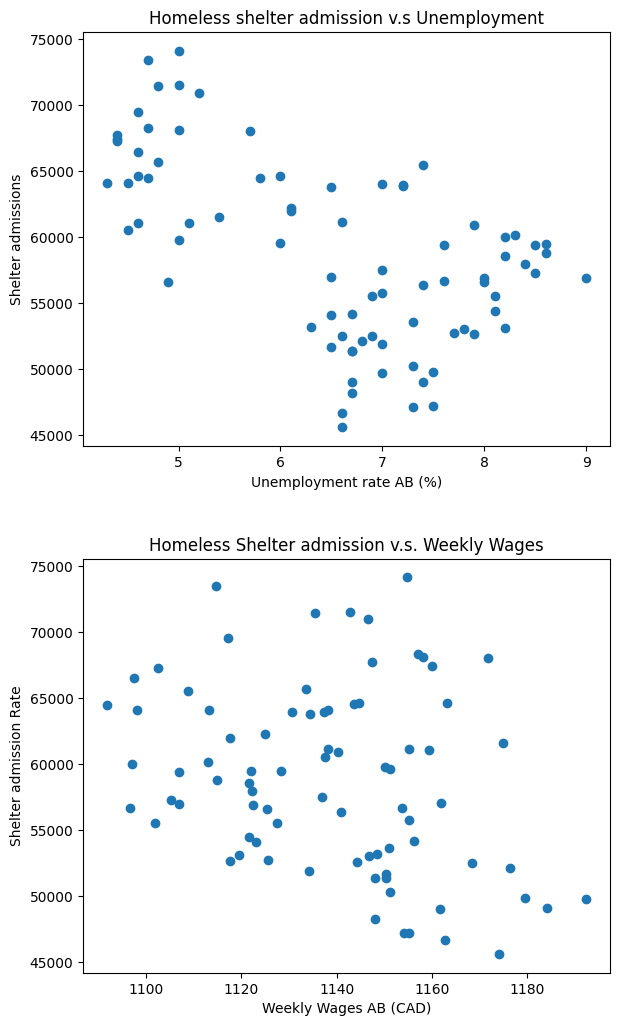

In [42]:
fig, ax=plt.subplots(2,1, figsize=(6,10))
fig.tight_layout(h_pad=6)

ax[0].scatter(x=a3["Unemployment AB"], y=a3["Overnight"])
# b0, a0 = np.polyfit(a3["Unemployment AB"],a3["Rate"], deg=1)
# ax[0].plot(a3["Unemployment AB"], a0 + b0 * a3["Unemployment AB"], color="r", lw=2.5)
ax[0].set(xlabel="Unemployment rate AB (%)", ylabel="Shelter admissions")
ax[0].set_title("Homeless shelter admission v.s Unemployment")

ax[1].scatter(x=a3["Weekly Wages AB"], y=a3["Overnight"])
# b1, a1 = np.polyfit(a3["Weekly Wages AB"],a3["Rate"], deg=1)
# ax[1].plot(a3["Weekly Wages AB"], a1 + b1 * a3["Weekly Wages AB"], color="r", lw=2.5)
ax[1].set_title("Homeless Shelter admission v.s. Weekly Wages")
ax[1].set(xlabel="Weekly Wages AB (CAD)", ylabel="Shelter admission Rate")



<AxesSubplot:>

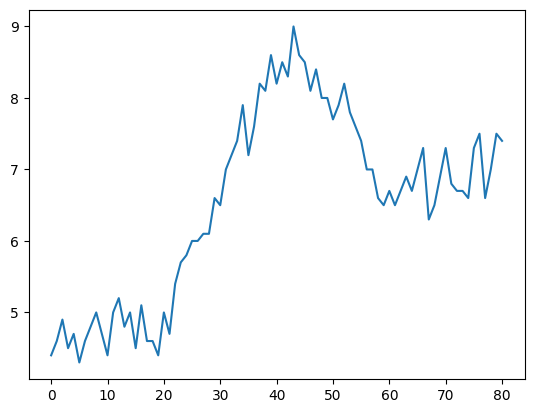

In [43]:
series=a3["Unemployment AB"]
series.plot()

<AxesSubplot:>

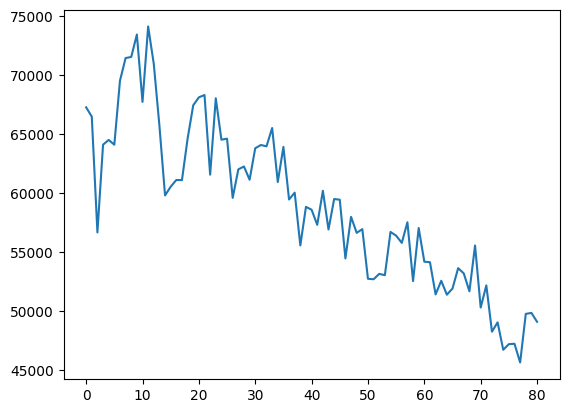

In [44]:
series2=a3["Overnight"]
series2.plot()

<AxesSubplot:>

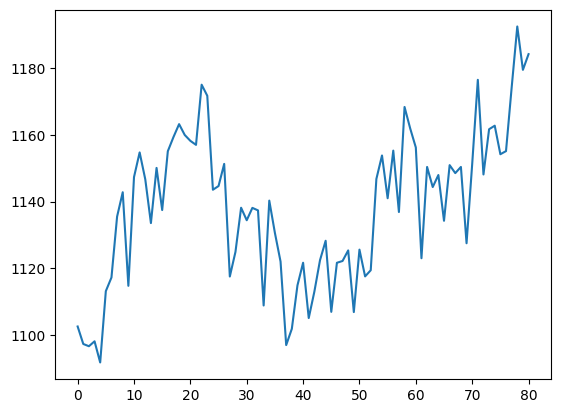

In [45]:
series3=a3["Weekly Wages AB"]
series3.plot()

Text(0.5, 1.0, 'Weekly Wages AB')

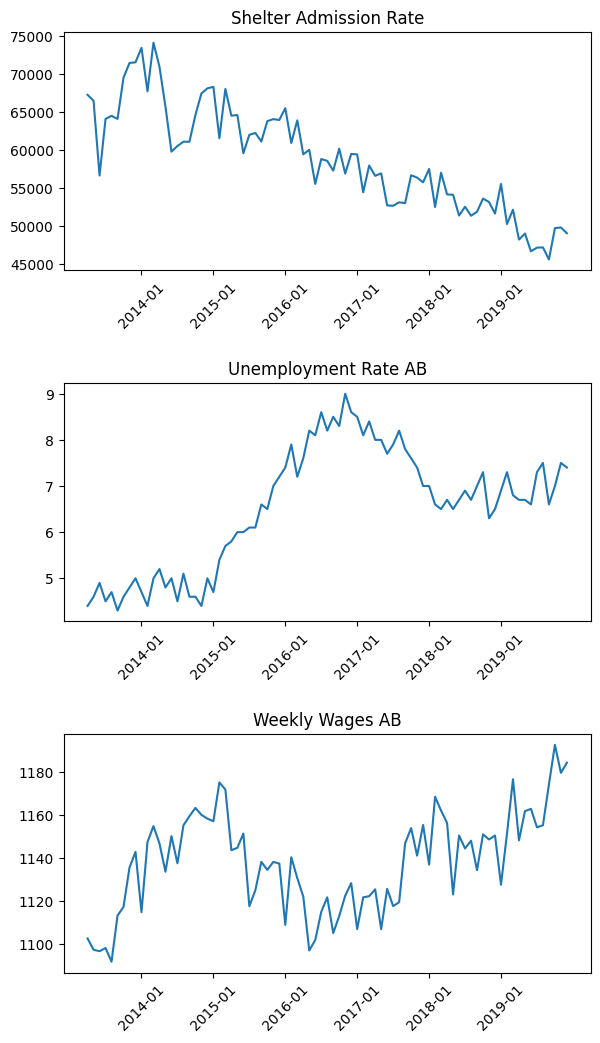

In [46]:
fig, ax=plt.subplots(3,1, figsize=(6,10))
fig.tight_layout(h_pad=6)
ax[0].plot(a3["Y-M"].astype("str"), a3["Overnight"])
ax[0].set_xticks(a3["Y-M"].astype("str")[9::12], rotation=45)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Shelter Admission Rate")
ax[1].plot(a3["Y-M"].astype("str"), a3["Unemployment AB"])
ax[1].set_xticks(a3["Y-M"].astype("str")[9::12])
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Unemployment Rate AB")
ax[2].plot(a3["Y-M"].astype("str"), a3["Weekly Wages AB"])
ax[2].set_xticks(a3["Y-M"].astype("str")[9::12])
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].set_title("Weekly Wages AB")



In [47]:
shifts = [0, 1, 3, 6, 9, 12]
for i in shifts:
    a4[f"shift_{i}"] = a4["Overnight"].shift(-i)

Text(0.5, 0.98, 'Unemployment vs Homeless Shelter admissions monthly')

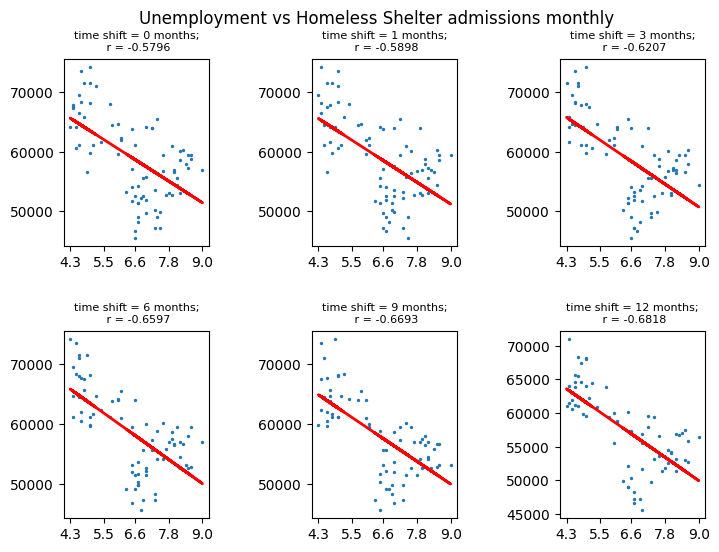

In [48]:
from scipy import stats

nrows = 2
ncols = 3

fig, ax = plt.subplots(2, 3, figsize=(8, 6))
fig.tight_layout(pad=4.0)

i = 0
for row in range(nrows):
    for col in range(ncols):
        ax[row, col].scatter(a4["Unemployment AB"], a4[f"shift_{shifts[i]}"], s=2)

        b, a = np.polyfit(
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Unemployment AB"],
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), f"shift_{shifts[i]}"],
            deg=1,
        )
        ax[row, col].plot(
            a4["Unemployment AB"],
            b * a4["Unemployment AB"] + a,
            linewidth=2,
            color="red",
        )
        r = stats.pearsonr(
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Unemployment AB"],
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), f"shift_{shifts[i]}"],
        )[0]
        ax[row, col].set_title(
            f"time shift = {shifts[i]} months;\n r = {round(r, 4)}", size=8
        )
        ax[row, col].set_xticks(
            [
                round(x, 1)
                for x in np.linspace(
                    a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Unemployment AB"].min(),
                    a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Unemployment AB"].max(),
                    5,
                )
            ]
        )
        i += 1

fig.suptitle("Unemployment vs Homeless Shelter admissions monthly")

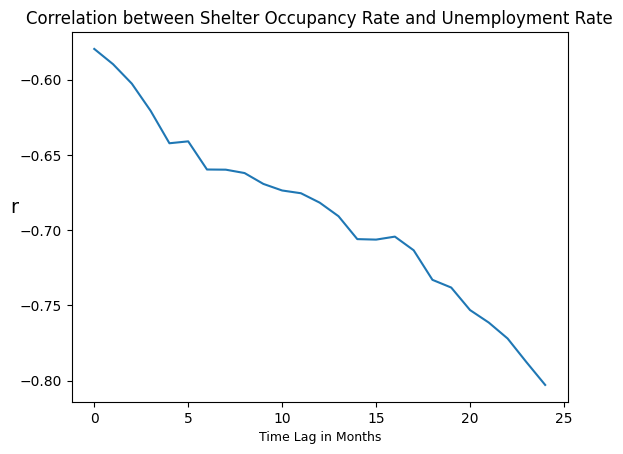

In [49]:
for i in range(25):
    a4[f"overnight_{i}"] = a4["Overnight"].shift(-i)

correlations = [
    stats.pearsonr(
        a4.loc[~a4[f"overnight_{i}"].isna(), "Unemployment AB"],
        a4.loc[~a4[f"overnight_{i}"].isna(), f"overnight_{i}"],
    )[0]
    for i in range(25)
]

fig, ax = plt.subplots(1, 1)
ax.plot(range(25), correlations)
ax.set_xlabel("Time Lag in Months", fontsize=9)
ax.set_ylabel("r", fontsize=14, rotation=0)
ax.set_title(
    "Correlation between Shelter Occupancy Rate and Unemployment Rate", fontsize=12
)
plt.show()

[Text(0.5, 1.0, 'Heatmap of lagged correlation for Admissions and Unemployment monthly')]

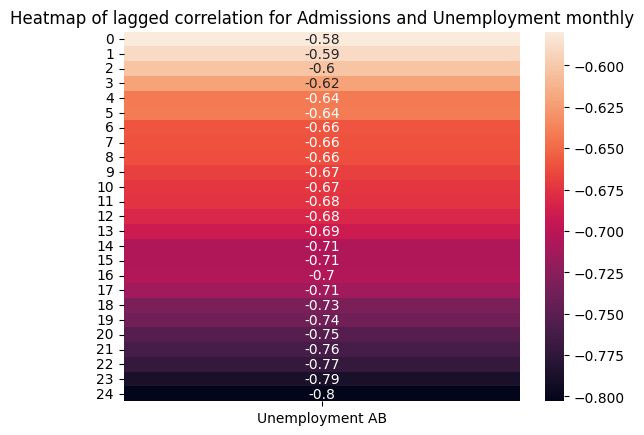

In [72]:
import seaborn as sns
tmp = a4.loc[:, [f"overnight_{i}" for i in range(0, 25)] + ["Unemployment AB"]]
corrs = tmp.corr()[["Unemployment AB"]][:-1].reset_index()[["Unemployment AB"]]
sns.heatmap(corrs, annot=True).set(title="Heatmap of lagged correlation for Admissions and Unemployment monthly")

In [ ]:
shifts = [0, 1, 3, 6, 9, 12]
for i in shifts:
    a4[f"shift_{i}"] = a4["Overnight"].shift(-i)

Text(0.5, 0.98, 'Weekly Wages vs Homeless Shelter admissions monthly')

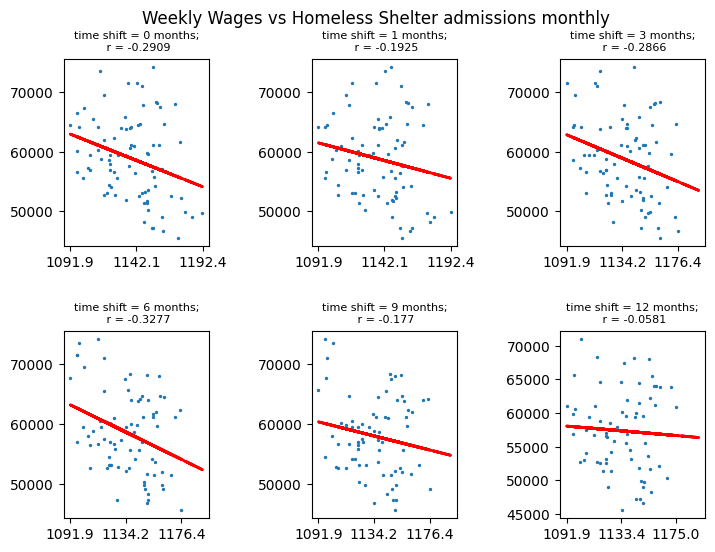

In [83]:
from scipy import stats

nrows = 2
ncols = 3

fig, ax = plt.subplots(2, 3, figsize=(8, 6))
fig.tight_layout(pad=4.0)

i = 0
for row in range(nrows):
    for col in range(ncols):
        ax[row, col].scatter(a4["Weekly Wages AB"], a4[f"shift_{shifts[i]}"], s=2)

        b, a = np.polyfit(
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Weekly Wages AB"],
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), f"shift_{shifts[i]}"],
            deg=1,
        )
        ax[row, col].plot(
            a4["Weekly Wages AB"],
            b * a4["Weekly Wages AB"] + a,
            linewidth=2,
            color="red",
        )
        r = stats.pearsonr(
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Weekly Wages AB"],
            a4.loc[~a4[f"shift_{shifts[i]}"].isna(), f"shift_{shifts[i]}"],
        )[0]
        ax[row, col].set_title(
            f"time shift = {shifts[i]} months;\n r = {round(r, 4)}", size=8
        )
        ax[row, col].set_xticks(
            [
                round(x, 1)
                for x in np.linspace(
                    a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Weekly Wages AB"].min(),
                    a4.loc[~a4[f"shift_{shifts[i]}"].isna(), "Weekly Wages AB"].max(),
                    3,
                )
            ]
        )
        i += 1

fig.suptitle("Weekly Wages vs Homeless Shelter admissions monthly")

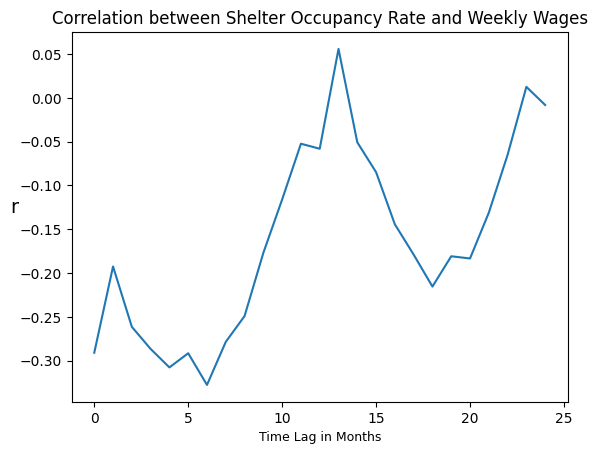

In [87]:
for i in range(25):
    a4[f"overnight_{i}"] = a4["Overnight"].shift(-i)

correlations = [
    stats.pearsonr(
        a4.loc[~a4[f"overnight_{i}"].isna(), "Weekly Wages AB"],
        a4.loc[~a4[f"overnight_{i}"].isna(), f"overnight_{i}"],
    )[0]
    for i in range(25)
]

fig, ax = plt.subplots(1, 1)
ax.plot(range(25), correlations)
ax.set_xlabel("Time Lag in Months", fontsize=9)
ax.set_ylabel("r", fontsize=14, rotation=0)
ax.set_title("Correlation between Shelter Occupancy Rate and Weekly Wages", fontsize=12)
plt.show()

[Text(0.5, 1.0, 'Heatmap of lagged correlation for Admissions and Weekly Wages monthly')]

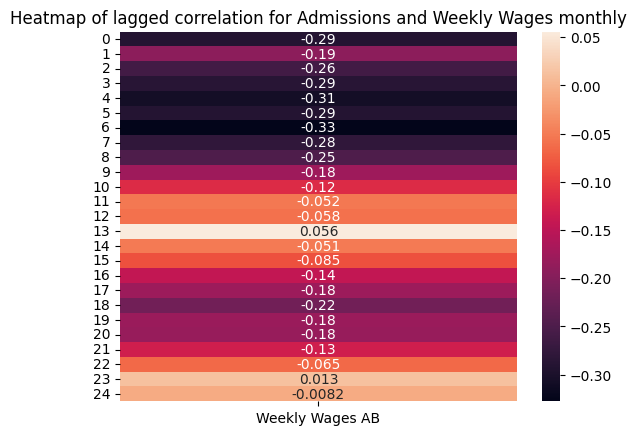

In [73]:
tmp = a4.loc[:, [f"overnight_{i}" for i in range(0, 25)] + ["Weekly Wages AB"]]
corrs = tmp.corr()[["Weekly Wages AB"]][:-1].reset_index()[["Weekly Wages AB"]]
sns.heatmap(corrs, annot=True).set(title="Heatmap of lagged correlation for Admissions and Weekly Wages monthly")

In [46]:
a4

,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB,shift_0,shift_1,shift_3,shift_6,shift_12,shift_24
0,2013-04,77250,67282,0.870964,4.4,1102.65,67282,66496.0,64111.0,69541.0,70969.0,64536.0
1,2013-05,75671,66496,0.878751,4.6,1097.42,66496,56663.0,64516.0,71466.0,65725.0,64622.0
2,2013-06,69030,56663,0.820846,4.9,1096.75,56663,64111.0,64111.0,71559.0,59807.0,59598.0
3,2013-07,71331,64111,0.898782,4.5,1098.22,64111,64516.0,69541.0,73463.0,60547.0,62016.0
4,2013-08,71331,64516,0.904459,4.7,1091.89,64516,64111.0,71466.0,67743.0,61116.0,62263.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,2019-08,70494,47212,0.669731,7.5,1155.09,47212,45625.0,49832.0,NaN,NaN,NaN
77,2019-09,68220,45625,0.668792,6.6,1174.05,45625,49750.0,49078.0,NaN,NaN,NaN
78,2019-10,70494,49750,0.705734,7.0,1192.36,49750,49832.0,NaN,NaN,NaN,NaN
79,2019-11,68220,49832,0.730460,7.5,1179.39,49832,49078.0,NaN,NaN,NaN,NaN


In [ ]:
# rhogrph = []
# rhoscatter = []
# N=4
# fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
# fig.suptitle( "Lagged Correlation between HS Occupancy Rate and Unemployment Rate - AB", fontsize=14)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
# fig.set_size_inches(8, 8)
# fig.set_dpi(100)
# for i in [0,1,3,7]:
#     a4[f"shift_{i}"] = a4["Unemployment AB"].shift(i)
#     k = int(i/3)
#     l=i % 3 
#     axs[k,l].scatter(x=a4[f"shift_{i}"], y=a4["Overnight"])
#     #ax.scatter(x=a4["Unemployment AB"], y=a4["Rate"])
#     b, a = np.polyfit(a4[f"shift_{i}"],a4["Overnight"], deg=1)
#     axs[k,l].plot(a4[f"shift_{i}"], a + b * a4[f"shift_{i}"], color="r", lw=2.5)
#     #ax.plot(a4["Unemployment AB"], a + b * a4["Unemployment AB"], color="r", lw=2.5)
#     rho1=stats.pearsonr(a4[f"shift_{i}"], a4["Overnight"])[0]
#     roundrho=round(rho1,6)
#     vrho.append(abs(rho1))
#     vrho2.append(rho1)
#     axs[k,l].set_title(f"Lag = {i} months, r={roundrho}")
#     axs[k,l].set_ylabel("H_Sh Admissions", size=14)
#     axs[k,l].set_xlabel("Unemployment rate", size=14)
   #reg = linear_model.LinearRegression()
    # reg.fit(
    #     np.array(weather_occupancy_2019["Air Temp. Min. (°C)"]).reshape(-1, 1)[i:], 
    #     weather_occupancy_2019[f"shift_{i}"][i:]
    # )
    # slopes.append(reg.coef_[0])
    # intercepts.append(reg.intercept_)

C:\Users\Testing5\AppData\Local\Temp\ipykernel_13248\3803983733.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
C:\Users\Testing5\AppData\Local\Temp\ipykernel_13248\3803983733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a4["Unemployment AB_shifted"] = a4["Unemployment AB"].shift(periods = 1)


,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB,Unemployment AB_shifted
6,2013-10,75093,69541,0.926065,4.6,1117.30,4.3
7,2013-11,75210,71466,0.950219,4.8,1135.52,4.6
8,2013-12,77717,71559,0.920764,5.0,1142.79,4.8
9,2014-01,78771,73463,0.932615,4.7,1114.81,5.0
10,2014-02,71148,67743,0.952142,4.4,1147.33,4.7
...,...,...,...,...,...,...,...
76,2019-08,70494,47212,0.669731,7.5,1155.09,7.3
77,2019-09,68220,45625,0.668792,6.6,1174.05,7.5
78,2019-10,70494,49750,0.705734,7.0,1192.36,6.6
79,2019-11,68220,49832,0.730460,7.5,1179.39,7.0


,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB,Unemployment AB_shifted,Unemployment AB_corr
30,2015-10,78027,63812,0.817819,6.5,1134.42,6.6,6.6
31,2015-11,77010,64084,0.832152,7.0,1138.12,6.5,6.5
32,2015-12,79577,63974,0.803926,7.2,1137.37,7.0,7.0
33,2016-01,79577,65528,0.823454,7.4,1108.93,7.2,7.2
34,2016-02,74443,60944,0.818667,7.9,1140.29,7.4,7.4
35,2016-03,79577,63924,0.803297,7.2,1130.61,7.9,7.9
36,2016-04,77010,59459,0.772095,7.6,1122.06,7.2,7.2
37,2016-05,78027,60042,0.769503,8.2,1097.09,7.6,7.6
38,2016-06,71310,55561,0.779147,8.1,1101.95,8.2,8.2
39,2016-07,73687,58834,0.798431,8.6,1114.95,8.1,8.1


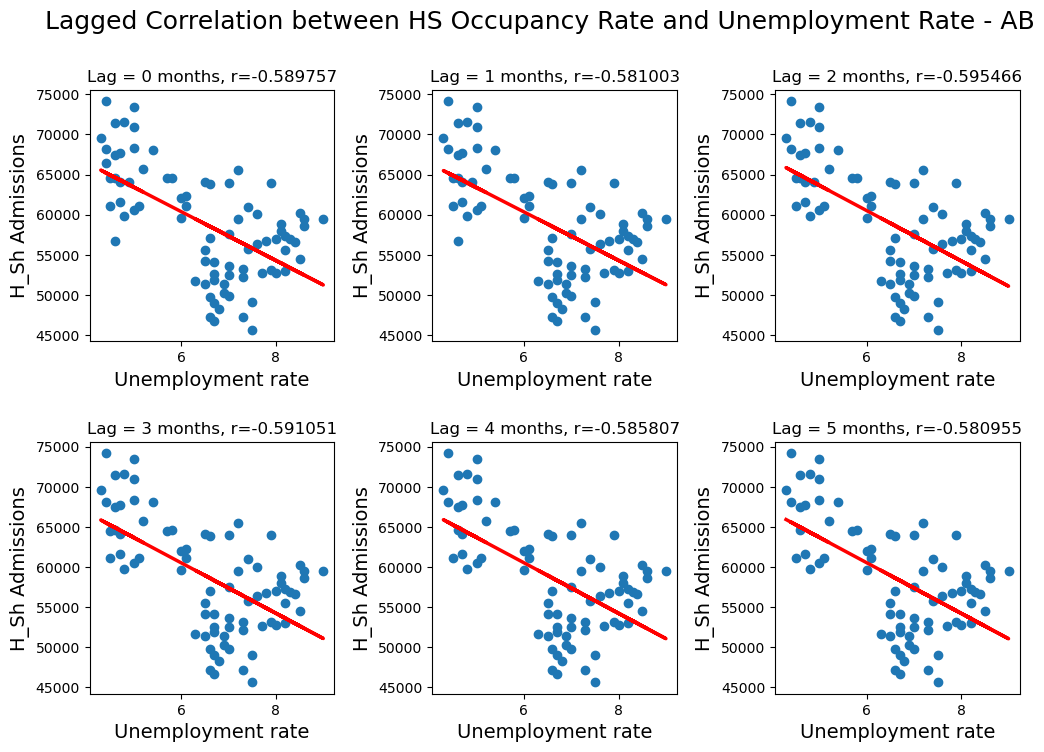

In [218]:
from scipy import stats
vrho=[]
vrho2=[]
N=6
fig, axs = plt.subplots(nrows=2, ncols=3, constrained_layout=True)
fig.suptitle( "Lagged Correlation between HS Occupancy Rate and Unemployment Rate - AB", fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
fig.set_size_inches(12, 8)
fig.set_dpi(100)
for i in range(N):
    shifted= a4["Unemployment AB"].shift(periods = i)
    a4=a4.dropna()
    #fig, ax=plt.subplots()
    k = int(i/3)
    l=i % 3 
    axs[k,l].scatter(x=shifted, y=a4["Overnight"])
    #ax.scatter(x=a4["Unemployment AB"], y=a4["Rate"])
    b, a = np.polyfit(shifted,a4["Overnight"], deg=1)
    axs[k,l].plot(shifted, a + b * shifted, color="r", lw=2.5)
    #ax.plot(a4["Unemployment AB"], a + b * a4["Unemployment AB"], color="r", lw=2.5)
    rho1=stats.pearsonr(shifted, a4["Overnight"])[0]
    roundrho=round(rho1,6)
    vrho.append(abs(rho1))
    vrho2.append(rho1)
    axs[k,l].set_title(f"Lag = {i} months, r={roundrho}")
    axs[k,l].set_ylabel("H_Sh Admissions", size=14)
    axs[k,l].set_xlabel("Unemployment rate", size=14)
display(a4)
Ncorr=24
vcorr=[]
for i in range(Ncorr):
    shifted= a4["Unemployment AB"].shift(periods = i)
    #a4["Unemployment AB_corr"] = a4["Unemployment AB"].shift(periods = 1)
    a4=a4.dropna()
    vcorr.append(stats.pearsonr(a4["Unemployment AB_corr"], a4["Overnight"])[0])
# display(vcorr)
# display(vrho2)
display(a4)




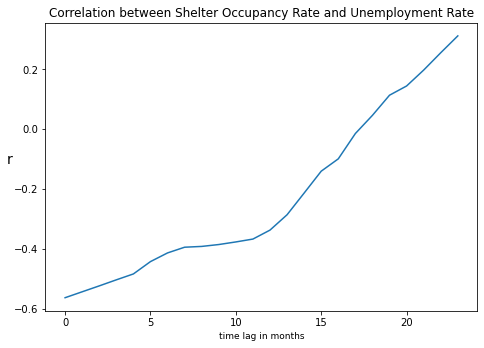

In [205]:
c


C:\Users\Testing5\AppData\Local\Temp\ipykernel_3744\2545780224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a5["Weekly Wages AB"] = a5["Weekly Wages AB"].shift(periods = 1)


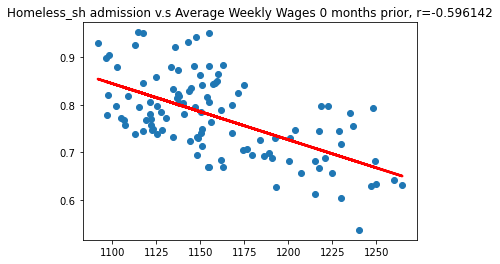

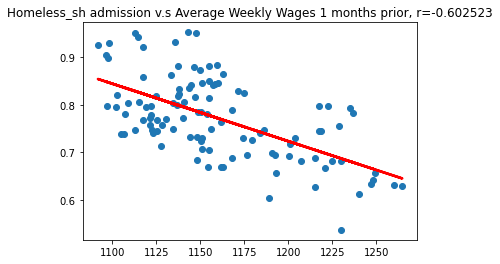

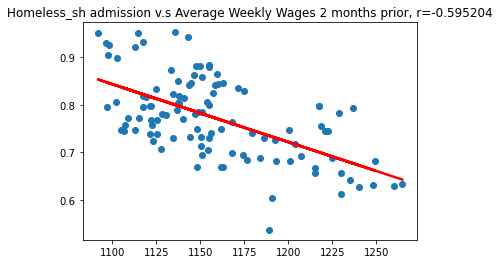

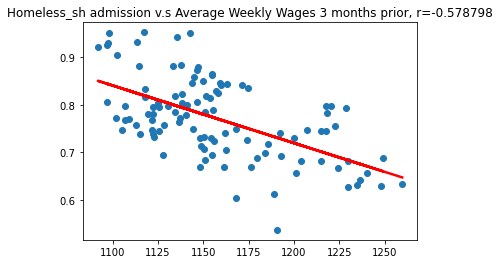

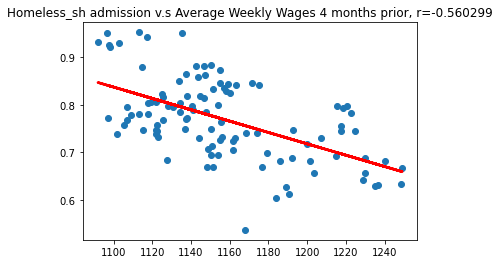

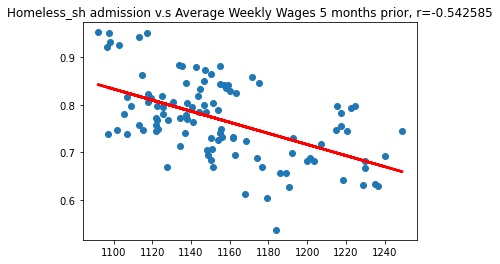

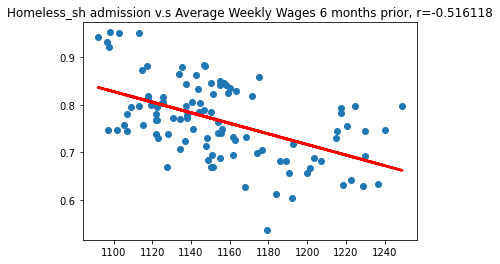

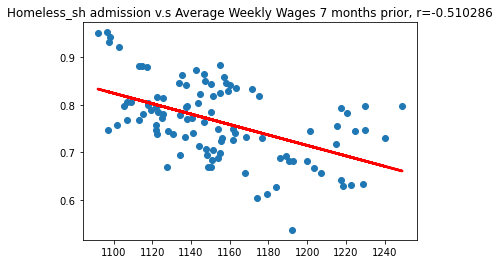

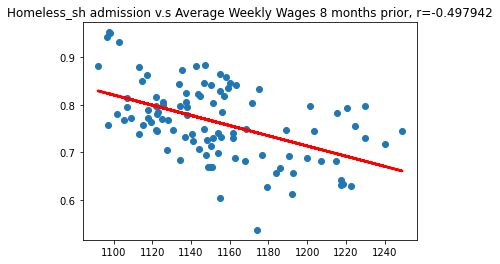

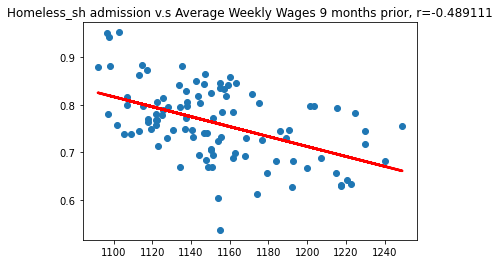

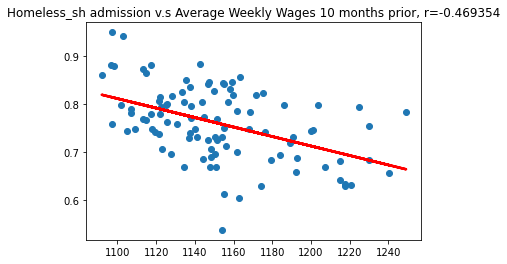

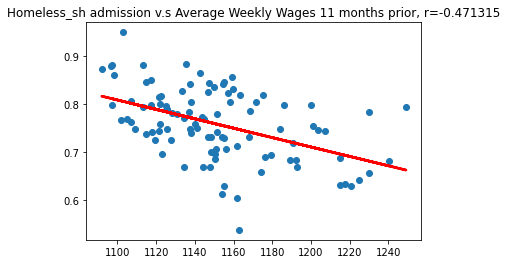

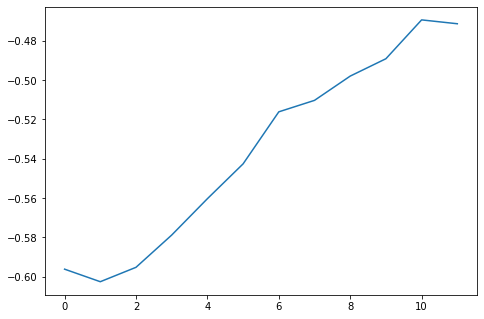

In [617]:
from scipy import stats
vrho=[]
vrho2=[]
N=12
for i in range(N):
    a5["Weekly Wages AB"] = a5["Weekly Wages AB"].shift(periods = 1)
    a5=a5.dropna()
    fig, ax=plt.subplots()
    ax.scatter(x=a5["Weekly Wages AB"], y=a5["Rate"])
    b, a = np.polyfit(a5["Weekly Wages AB"],a5["Rate"], deg=1)
    ax.plot(a5["Weekly Wages AB"], a + b * a5["Weekly Wages AB"], color="r", lw=2.5)
    rho1=stats.pearsonr(a5["Weekly Wages AB"], a5["Rate"])[0]
    roundrho=round(rho1,6)
    vrho.append(abs(rho1))
    vrho2.append(rho1)
    ax.set_title(f"Homeless_sh admission v.s Average Weekly Wages {i} months prior, r={roundrho}")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
time_lag=[i for i in range(N)]
ax.plot(time_lag,vrho2)
plt.show()


In [541]:
from scipy import stats
vrho=[]
vrho2=[]
N=3
for i in range(N):
    a4["Unemployment AB"] = a4["Unemployment AB"].shift(periods =3 * i)
    a4=a4.dropna()
    display(a4)
    # fig, ax=plt.subplots()
    # ax.scatter(x=a4["Unemployment AB"], y=a4["Rate"])
    # b, a = np.polyfit(a4["Unemployment AB"],a4["Rate"], deg=1)
    # ax.plot(a4["Unemployment AB"], a + b * a4["Unemployment AB"], color="r", lw=2.5)
    rho1=stats.pearsonr(a4["Unemployment AB"], a4["Rate"])[1]
    roundrho=round(rho1,4)
    vrho.append(abs(rho1))
    vrho2.append(rho1)
    print(rho1)
    # ax.set_title(f"Homeless_sh admission v.s Unemployment {3 * i} months prior, r={roundrho}")
print(vrho2)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# time_lag=[i for i in range(N)]
# ax.plot(time_lag,vrho2)
# plt.show()


,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
66,2018-10,73253,53632,0.732147,4.4,1150.90
67,2018-11,70890,53185,0.750247,4.6,1148.51
68,2018-12,70830,51666,0.729437,4.9,1150.36
69,2019-01,70866,55557,0.783973,4.5,1127.54
70,2019-02,64008,50288,0.785652,4.7,1151.20
71,2019-03,73191,52169,0.712779,4.3,1176.41
72,2019-04,68220,48239,0.707109,4.6,1148.11
73,2019-05,70494,49032,0.695549,4.8,1161.64
74,2019-06,68220,46703,0.684594,5.0,1162.69
75,2019-07,70494,47181,0.669291,4.7,1154.16


0.5849498668917203


,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
69,2019-01,70866,55557,0.783973,4.4,1127.54
70,2019-02,64008,50288,0.785652,4.6,1151.20
71,2019-03,73191,52169,0.712779,4.9,1176.41
72,2019-04,68220,48239,0.707109,4.5,1148.11
73,2019-05,70494,49032,0.695549,4.7,1161.64
74,2019-06,68220,46703,0.684594,4.3,1162.69
75,2019-07,70494,47181,0.669291,4.6,1154.16
76,2019-08,70494,47212,0.669731,4.8,1155.09
77,2019-09,68220,45625,0.668792,5.0,1174.05
78,2019-10,70494,49750,0.705734,4.7,1192.36


0.3552457045891403


,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
75,2019-07,70494,47181,0.669291,4.4,1154.16
76,2019-08,70494,47212,0.669731,4.6,1155.09
77,2019-09,68220,45625,0.668792,4.9,1174.05
78,2019-10,70494,49750,0.705734,4.5,1192.36
79,2019-11,68220,49832,0.730460,4.7,1179.39
80,2019-12,70618,49078,0.694979,4.3,1184.09
81,2020-01,70618,51247,0.725693,4.6,1168.09
82,2020-02,66062,48976,0.741364,4.8,1190.47
83,2020-03,71734,49453,0.689394,5.0,1189.28
84,2020-04,72324,50584,0.699408,4.7,1229.95


0.6496457983805988
[0.5849498668917203, 0.3552457045891403, 0.6496457983805988]


In [490]:
a4

,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
3,2013-07,71331,64111,0.898782,4.4,1098.22
4,2013-08,71331,64516,0.904459,4.6,1091.89
5,2013-09,69030,64111,0.928741,4.9,1113.22
6,2013-10,75093,69541,0.926065,4.5,1117.30
7,2013-11,75210,71466,0.950219,4.7,1135.52
...,...,...,...,...,...,...
106,2022-02,50512,40115,0.794168,7.6,1259.78
107,2022-03,68132,43712,0.641578,7.5,1264.69
108,2022-04,63960,40392,0.631520,7.2,1247.14
109,2022-05,66236,41695,0.629492,6.8,1249.94


In [290]:
# from scipy import stats
# vrho=[]
# N=25
# for i in range(4):
#     a4[f"Unemployment AB shift_{i}"] = a4["Unemployment AB"].shift(3)
#     a4=a4.dropna()
#     fig, ax=plt.subplots()
#     ax.scatter(x=a4[f"Unemployment AB shift_{i}"], y=a4["Rate"])
#     b, a = np.polyfit(a4[f"Unemployment AB shift_{i}"],a4["Rate"], deg=1)
#     ax.plot(a4[f"Unemployment AB shift_{i}"], a + b * a4[f"Unemployment AB shift_{i}"], color="r", lw=2.5)
#     rho1=stats.pearsonr(a4[f"Unemployment AB shift_{i}"], a4["Rate"])[0]
#     roundrho=round(rho1,4)
#     vrho.append(abs(rho1))
#     ax.set_title(f"Homeless_sh admission v.s Unemployment {3 * i} months prior, r={roundrho}")

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# time_lag=[i for i in range(N)]
# ax.plot(time_lag,vrho)
# plt.show()
    
    
    
    
    
# my_rho = np.corrcoef(a3[f"Unemployment AB shift_{i}"], a3["Rate"])
# print(my_rho)

#fig, ax=plt.subplots()
#     #fig.tight_layout(h_pad=6)
# ax.scatter(x=a3["Unemployment AB"], y=a3["Rate"])
# b, a = np.polyfit(a3["Unemployment AB"],a3["Rate"], deg=1)
# ax.plot(a3["Unemployment AB"], a + b * a3["Unemployment AB"], color="r", lw=2.5)
#     #ax[0, 0].set(xlabel="Unemployment rate AB (%) shift back: " + str(k) +" months."), ylabel="Shelter admission Rate per 100k residents")
# ax.set_title("Homeless shelter admission v.s Unemployment")
    
    

In [241]:
a3

,Y-M,Capacity,Overnight,Rate,Unemployment AB,Weekly Wages AB
0,2013-04,77250,67282,0.870964,NaN,1102.65
1,2013-05,75671,66496,0.878751,NaN,1097.42
2,2013-06,69030,56663,0.820846,NaN,1096.75
3,2013-07,71331,64111,0.898782,4.4,1098.22
4,2013-08,71331,64516,0.904459,4.6,1091.89
...,...,...,...,...,...,...
106,2022-02,50512,40115,0.794168,7.6,1259.78
107,2022-03,68132,43712,0.641578,7.5,1264.69
108,2022-04,63960,40392,0.631520,7.2,1247.14
109,2022-05,66236,41695,0.629492,6.8,1249.94


LinAlgError: SVD did not converge in Linear Least Squares

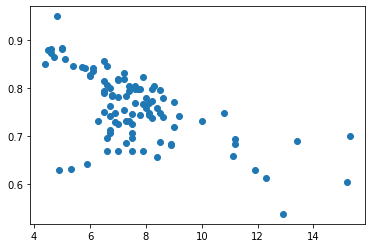

In [197]:
#for i in [1,2,3,4,5 6]:
#a3["Y-M2"]=a3["Y-M"]

# fig, ax=plt.subplots(3,2, figsize=(9,15))
# fig.tight_layout(h_pad=6)
# i=0
# j=0
# for k in range(5):
a3["Unemployment AB"]=a3["Unemployment AB"].shift(-1)
#     if k % 2 == 1:
#         j==1, i==int(k/2)-1
#     else:
#         j==0, i==int(k/2)
# #     ax[i,j].scatter(x=a3["Unemployment AB"], y=a3["Rate"])
#     b, a = np.polyfit(a3["Unemployment AB"],a3["Rate"], deg=1)
#     ax[i,j].plot(a3["Unemployment AB"], a + b * a3["Unemployment AB"], color="r", lw=2.5)
#     ax[i,j].set(xlabel="Unemployment rate AB (%) shift back: " + str(k) +" months."), ylabel="Shelter admission Rate per 100k residents")
#     ax[i,j].set_title("Homeless shelter admission v.s Unemployment")
fig, ax=plt.subplots()
    #fig.tight_layout(h_pad=6)
ax.scatter(x=a3["Unemployment AB"], y=a3["Rate"])
b, a = np.polyfit(a3["Unemployment AB"],a3["Rate"], deg=1)
ax.plot(a3["Unemployment AB"], a + b * a3["Unemployment AB"], color="r", lw=2.5)
    #ax[0, 0].set(xlabel="Unemployment rate AB (%) shift back: " + str(k) +" months."), ylabel="Shelter admission Rate per 100k residents")
ax.set_title("Homeless shelter admission v.s Unemployment")
    
    
    # a3["Unemployment AB"]=a3["Unemployment AB"].shift(0)
    # a3["Unemployment AB"]=a3["Unemployment AB"].shift(0)
   # weather_occupancy_2019[f"shift_{i}"] = weather_occupancy_2019["occupancy_rate"].shift(i)

TypeError: expected non-empty vector for x

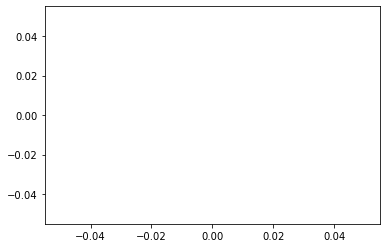

In [52]:
from scipy import stats
vrho=[]
N=25
for i in range(N):
    a3[f"UnemploymentABshift_{i}"] = a3["Unemployment AB"].shift(i)
    a3=a3.dropna()
    fig, ax=plt.subplots()
    ax.scatter(x=a3[f"UnemploymentABshift_{i}"], y=a3["Rate"])
    b, a = np.polyfit(a3[f"UnemploymentABshift_{i}"],a3["Rate"], deg=1)
    ax.plot(a3[f"UnemploymentABshift_{i}"], a + b * a3[f"UnemploymentABshift_{i}"], color="r", lw=2.5)
    rho1=stats.pearsonr(a3[f"UnemploymentABshift_{i}"], a3["Rate"])[0]
    roundrho=round(rho1,4)
    vrho.append(abs(rho1))
    ax.set_title(f"Homeless_sh admission v.s Unemployment {i} months prior, r={roundrho}")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
time_lag=[i for i in range(N)]
ax.plot(time_lag,vrho)
plt.show()

In [ ]:
a3["Y-M2"]=a3["Y-M"]


#fig.tight_layout(h_pad=6)
i=0
j=0
for k in range(5):
    a3["Unemployment AB"]=a3["Unemployment AB"].shift(1)
    
    fig, ax=plt.subplots(1,1)
    # if k % 2 == 0:
    #     j==1, i==int(k/2)-1
    # else:
    #     j==0, i==int(k/2)
#     ax[i,j].scatter(x=a3["Unemployment AB"], y=a3["Rate"])
#     b, a = np.polyfit(a3["Unemployment AB"],a3["Rate"], deg=1)
#     ax[i,j].plot(a3["Unemployment AB"], a + b * a3["Unemployment AB"], color="r", lw=2.5)
#     ax[i,j].set(xlabel="Unemployment rate AB (%) shift back: " + str(k) +" months."), ylabel="Shelter admission Rate per 100k residents")
#     ax[i,j].set_title("Homeless shelter admission v.s Unemployment")

    ax[0].scatter(x=a3["Unemployment AB"], y=a3["Rate"])
    # b, a = np.polyfit(a3["Unemployment AB"],a3["Rate"], deg=1)
    # ax[0, 0].plot(a3["Unemployment AB"], a + b * a3["Unemployment AB"], color="r", lw=2.5)
    #ax[0, 0].set(xlabel="Unemployment rate AB (%) shift back: " + str(k) +" months."), ylabel="Shelter admission Rate per 100k residents")
    ax[0].set_title("Homeless shelter admission v.s Unemployment")
    
    
    # a3["Unemployment AB"]=a3["Unemployment AB"].shift(0)
    # a3["Unemployment AB"]=a3["Unemployment AB"].shift(0)
   # weather_occupancy_2019[f"shift_{i}"] = weather_occupancy_2019["occupancy_rate"].shift(i)